# Bayesian Statistics

## Revisiting Bayes' Theorem

Basic conditional probability: 

$p(B|A)=\frac{p(B\cap A)}{p(A)}$ (1)

Since $p(B|A) \ne p(A|B)$, BUT $p(B \cap A) = p(A \cap B)$: 

$p(A|B)=\frac{p(B\cap A)}{p(B)}$ (2)

Then, we derive Bayes' rule: 

$p(A|B)=\frac{p(B|A)p(A)}{p(B)}$ (3)

Now, let's assume that our model parameters are $\theta$ and dataset is $y$:

$p({\boldsymbol{\theta }}|{\boldsymbol{y}})=\frac{p({\boldsymbol{y}}|{\boldsymbol{\theta }})p({\boldsymbol{\theta }})}{p({\boldsymbol{y}})}$ (4)

Often, we just use the proportional distribution, rather than the fully-normalized posterior:

$p({\boldsymbol{\theta }}|{\boldsymbol{y}})\propto p({\boldsymbol{y}}|{\boldsymbol{\theta }})p({\boldsymbol{\theta }})$ (5)

Now, we can break this down into different terms:

- $p(\theta)$ is known as the **prior**, probability of the model (hypothesis) before seeing data
- $p(\theta | y)$ is known as the **posterior**, probability of the model (hypothesis) after seeing data
- $p(y | \theta)$ is known as the **likelihood**, probability of the data given a hypothesis

**_So, what does this mean in terms of solving a statistical problem?_**

- **Prior:** use any background information we have, or any assumptions we have
- **Likelihood:** use any data we can collect to compute probability for each hypothesis
- **Posterior:** A result of a **Bayesian update** (using prior probabilities and new data to compute current probability)

## Bayesian statistics treat models as non-permanent (ever evolving) distributions

Benefits:

1. Prior information is captured
2. Updates can increase accuracy of model
3. Models are interpretable
4. Non-long-run statistics can be captured

Drawbacks:

1. Prior assumptions are weighed in
2. More complex setup

![Bayesian statistics workflow](bayesian_cycle.png)

*Figure 1: The Bayesian statistics workflow works similar to humanistic approaches to research problems.*

## Updates via Bayes Tables

> Suppose there are two bowls of cookies.
>
> * Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. 
>
> * Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.
>
> Now suppose you choose one of the bowls at random and, without looking, choose a cookie at random. If the cookie is vanilla, what is the probability that it came from Bowl 1?

Let's set this up!  Here are the steps:

1. What are our variables and how can we relate them?  In other words, what information do we have, and what are we trying to figure out?

- $V$ is an event for receiving a vanilla cookie
- $C$ is an event for receiving a chocolate cookie
- $B_1$ is an event for receiving a cookie out of Bowl 1
- $B_2$ is an event for receiving a cookie out of Bowl 2

**Question:** What is $P(B_1|V)$ (the posterior)?  Using our prior, likelihood, and posterior workflow: $P(B_1) P(V|B_1)$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Tabularize our information:

In [ ]:
df_cookies = pd.DataFrame(index=['B1', 'B2'])

In [ ]:
from fractions import Fraction

df_cookies['prior'] = Fraction(1, 2), Fraction(1, 2)  # assumption for bowls
df_cookies

In [ ]:
df_cookies['likelihood'] = Fraction(30, 40), Fraction(20, 40)
df_cookies

3. Multiply to obtain the un-normalized posterior:

In [ ]:
df_cookies['unnorm_post'] = df_cookies['prior'] * df_cookies['likelihood']
df_cookies

4. Normalize the posterior by dividing by the total probability so far:

In [ ]:
df_cookies['posterior'] = df_cookies['unnorm_post'] / df_cookies['unnorm_post'].sum()
df_cookies

## The power of Bayesian statistics!

### The Monty Hall Problem

The Monty Hall problem (one of the most contentious problems in probability!) is based on a game show called *Let's Make a Deal*. If you are a contestant on the show, here's how the game works:
1. The host, Monty Hall, shows you three closed doors -- numbered 1, 2, and 3 -- and tells you that there is a prize behind each door.
2. One prize is valuable (traditionally a car), the other two are less valuable (traditionally goats).
3. The object of the game is to guess which door has the car. If you guess right, you get to keep the car.

![Monty hall problem illustrated](monty_hall.png)

_Figure 2: The Monty Hall problem illustrated._

**The question:** Suppose you pick Door 1. Before opening the door you chose, Monty opens Door 3 and reveals a goat. Then Monty offers you the option to stick with your original choice or switch to the remaining unopened door. _To maximize your chance of winning the car, should you stick with Door 1 or switch to Door 2?_

### Bayes to the rescue! The solution to the Monty Hall problem:

To answer this question, we have to make some assumptions about the behavior of the host:

1.  Monty always opens a door and offers you the option to switch.

2.  He never opens the door you picked or the door with the car.

3.  If you choose the door with the car, he chooses one of the other
    doors at random.

We start with three hypotheses: the car might be behind Door 1, 2, or 3. 

According to the statement of the problem, the prior probability for each door is 1/3:

In [ ]:
df_monty = pd.DataFrame(index=['D1', 'D2', 'D3'])
df_monty['priors'] = Fraction(1, 3)
df_monty

We also have new data, where Monty opened Door 3 and revealed a goat. Let's convert this data into the probability for each hypothesis (likelihood):

In [ ]:
df_monty['likelihoods'] = Fraction(1, 2), 1, 0
df_monty

Now, we can perform a Bayesian update (compute the unnormalized posterior and normalized posterior):

In [ ]:
df_monty['unnorm_posts'] = df_monty['priors'] * df_monty['likelihoods']
df_monty['posteriors'] = df_monty['unnorm_posts'] / df_monty['unnorm_posts'].sum()
df_monty

**Our conclusion:** So, should we stick with Door 1 or switch to Door 2?

## Distribution functions

**pmf: Probability mass function (discrete), $f_X(x) = p(X = x)$**

**pdf: Probability density function (continuous), $f_X(x) = \frac{dF_X(x)}{dx}$**

**cdf: Cumulative distribution function, $F_X(x) = p(X \le x)$**

In [ ]:
import scipy.stats

# modeling bananas in a bunch: 2 to 8 bananas, uniformly possible
example_dist = scipy.stats.randint(2, 9)

x = np.arange(0, 10)
fig = plt.figure(figsize=(8,8))
plt.stem(x, example_dist.pmf(x), label='pmf')
plt.plot(x, example_dist.cdf(x), label='cdf')
plt.grid(linestyle='--')
plt.legend(fontsize='xx-large')

## Bayesian estimation example

I often see [rabbits](https://en.wikipedia.org/wiki/Eastern_cottontail) in the garden behind my house, but it's not easy to tell them apart, so I don't really know how many there are.

Suppose I deploy a motion-sensing [camera trap](https://en.wikipedia.org/wiki/Camera_trap) that takes a picture of the first rabbit it sees each day.  After three days, I compare the pictures and conclude that two of them are the same rabbit and the other is different.

How many rabbits visit my garden? --> What is the chance of 4 rabbits visiting my garden? 5 rabbits? 6 rabbits?

To answer this question, we have to think about the prior distribution and the likelihood of the data:

* I have sometimes seen four rabbits at the same time, so I know there are at least that many.  I would be surprised if there were more than 10.  So, at least as a starting place, I think a uniform prior from 4 to 10 is reasonable.

* To keep things simple, let's assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day.  Let's also assume it is guaranteed that the camera trap gets a picture every day.

1. Setup the prior:

In [ ]:
hypotheses = np.arange(1, 11)

prior_dist = scipy.stats.randint(4, 11)
priors = prior_dist.pmf(hypotheses)

print(f"hypotheses: {hypotheses}")
print(f"priors: {priors}")

plt.stem(hypotheses, priors)
plt.title("Prior")

2. Incorporate data into a likelihood distribution.  Our data is that two rabbits were the same, and the third is different. This means that the probability for capturing the same rabbit can be found by multiplying two probabilities:
    1. That the second image is the same rabbit as the first: $1/N$ (uniform probability), where $N$ is the number of rabbits.
    2. That the third image is a different rabbit as the first two images: $\frac{N-1}{N}$ (uniform probability complement).

Normally, our data is from experiments, but in this case we have a model that is "simulated":

In [ ]:
# N = hypotheses
day2_likelihoods = (1 / hypotheses)  # day 2 update
# print(f"day 2 likelihoods: {day2_likelihoods}")

3. Now, perform our Bayesian update:

In [ ]:
day2_unnorm_posts = priors * day2_likelihoods
# print(f"day 2 unnormalized posteriors: {day2_unnorm_posts}")

In [ ]:
day2_posteriors = day2_unnorm_posts / day2_unnorm_posts.sum()
print(f"day 2 posteriors: {day2_posteriors}")
plt.scatter(hypotheses, priors, label="Original priors")
plt.scatter(hypotheses, day2_posteriors, label="Day 2 posteriors")
plt.legend()

In [ ]:
day3_priors = day2_posteriors.copy()
day3_likelihoods = (hypotheses - 1) / hypotheses
day3_unnorm_posts = day3_priors * day3_likelihoods
# print(f"day 3 unnormalized posteriors: {day3_unnorm_posts}")

day3_posteriors = day3_unnorm_posts / day3_unnorm_posts.sum()
print(f"day 3 posteriors: {day3_posteriors}")
fig = plt.figure(figsize=(10, 10))
plt.scatter(hypotheses, priors, label="Original priors")
plt.scatter(hypotheses, day2_posteriors, label="Day 2 posteriors")
plt.scatter(hypotheses, day3_posteriors, label="Day 3 posteriors")
plt.legend()

Create a specialized class (data type):

In [ ]:
class BayesianEstimation(object):
    def __init__(self, hypotheses: np.ndarray, prior_dist: scipy.stats.rv_discrete):
        """
        BayesianEstimation(hypotheses, prior_dist) builds a Bayesian estimation
          data structure that helps with computing Bayesian estimation problems.

        :param hypotheses: numpy array representing the hypotheses
        :param prior_dist: distribution for the priors
        """
        self.hypotheses = hypotheses
        self.prior_dist = prior_dist
        self.priors = self.prior_dist.pmf(self.hypotheses)
        self.posteriors = [self.priors]

    def update(self, likelihood: np.ndarray) -> np.ndarray:
        """
        update(likelihood) updates the posteriors and returns the normalized posterior
        """
        self.posteriors.append(self.posteriors[-1] * likelihood)
        self.posteriors[-1] = self.posteriors[-1] / self.posteriors[-1].sum()
        return self.posteriors[-1]

    def plot(self):
        """
        plot() plots all the posteriors
        """
        fig = plt.figure(figsize=(10, 10))
        plt.scatter(hypotheses, priors, label="Priors")
        # for idx in range(len(self.posteriors)):
        #     self.posteriors[idx]
        for idx, item in enumerate(self.posteriors):
            plt.plot(hypotheses, item, label=f"Posterior {idx}")
        plt.legend()

In [ ]:
hypotheses = np.arange(1, 11)
prior_dist = scipy.stats.randint(4, 11)

my_rabbit_problem = BayesianEstimation(hypotheses, prior_dist)
my_rabbit_problem.update(1 / my_rabbit_problem.hypotheses)
my_rabbit_problem.update((my_rabbit_problem.hypotheses - 1) / my_rabbit_problem.hypotheses)
my_rabbit_problem.plot()

Just like with frequentist estimation, we want to know how confident we can be! Enter the Bayesian version of a confidence interval, the 90% **credible interval**, which are the quantities that bound the middle 90% probability, for instance:

In [ ]:
def get_quantile(df_posterior: pd.DataFrame, col_probs: str,
                 col_hypos: str, desired_prob: float) -> float:
    """
    Compute the quantile for the desired probability.
    """
    acc_probs = 0.0
    for _, row in df_posterior.iterrows():
        acc_probs += row[col_probs]
        if acc_probs >= desired_prob:
            return row[col_hypos]
    return np.nan

In [ ]:
dict_rabbits = {
    "number of rabbits": my_rabbit_problem.hypotheses,
    "probabilities": my_rabbit_problem.posteriors[-1]
}

df_rabbits = pd.DataFrame.from_dict(dict_rabbits)
df_rabbits.head()

In [ ]:
get_quantile(df_rabbits, "probabilities", "number of rabbits", 0.05)

In [ ]:
get_quantile(df_rabbits, "probabilities", "number of rabbits", 0.95)

In [ ]:
df_rabbits.loc[df_rabbits['probabilities'].idxmax()]

**What can we draw from this?**

1. Our credible interval is incredibly large.  We probably need more data.
2. If we adjust the prior, we will get vastly different posteriors. The prior we have is called an uninformative prior.

## Bayesian regression

### Installing PyMC3 properly

It turns out that the `conda-forge` version of `PyMC3` is [slightly broken](https://github.com/pymc-devs/pymc/wiki/Installation-Guide-(Windows)) on Windows.  

For Windows users with normal processors (Intel Core series or AMD Ryzen series), we have to do the following:

1. Make sure everything is updated: `mamba upgrade --all`
2. Use `mamba` to install: `libpython mkl-service m2w64-toolchain numba python-graphviz arviz dill cachetools patsy semver typing-extensions cachetools fastprogress xarray filelock netcdf4 libblas blas lapack`
3. Then, use `pip` to install `pymc3`.  This is necessary to trigger compilation of PyMC3, which isn't being triggered by the conda-forge version for some reason.
4. Finally, we'll also install `bambi` using `pip`. `bambi` is an easier way to use `PyMC3` to create Bayesian models once we are comfortable with the pymc3 underpinnings.

For Windows users with workstation/server processors (Intel Xeon series or AMD Epyc series), we have to do the following:

1. Make sure everything is updated: `mamba upgrade --all`
2. Use `mamba` to install: `libpython mkl-service numba python-graphviz arviz dill cachetools patsy semver typing-extensions cachetools fastprogress xarray filelock netcdf4 libblas blas lapack` (notice that we will NOT install m2w64-toolchain).
3. Install MSYS2 following its directions: https://www.msys2.org/
4. Add your path for MSYS2's MinGW64 bin folder (for instance, mine is `C:\msys64\mingw64\bin`) to the user PATH.  Then, close and re-open mambaforge prompt.
5. Then, use `pip` to install `pymc3`.  This is necessary to trigger compilation of PyMC3, which isn't being triggered by the conda-forge version for some reason.
6. Finally, we'll also install `bambi` using `pip`. `bambi` is an easier way to use `PyMC3` to create Bayesian models once we are comfortable with the pymc3 underpinnings.

### Example Generalized Linear Model problem with Ordinary Linear Regression

**Dataset:** `https://github.com/AllenDowney/ThinkBayes2/raw/master/data/2239075.csv`

**Dataset info:** The five core elements are:
- PRCP = Precipitation (tenths of mm)
- SNOW = Snowfall (mm)
- SNWD = Snow depth (mm)
- TMAX = Maximum temperature (tenths of degrees C)
- TMIN = Minimum temperature (tenths of degrees C)


**Research question:** Can we create a Bayesian regression model to predict snowfall?

Note that regression is still: $y = ax + b + \epsilon$

First, we create the DataFrame as usual:

In [9]:
import pandas as pd

df_snowfall = pd.read_csv("https://github.com/AllenDowney/ThinkBayes2/raw/master/data/2239075.csv")
columns_to_keep = ['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']
# df_snowfall = df_snowfall.drop(columns=[col for df_snowfall.columns if col not in columns_to_keep], axis=1)
df_snowfall = df_snowfall[columns_to_keep].copy()  # copy to make it a brand new dataframe
print(len(df_snowfall))
df_snowfall.tail()

def get_year(date_string: str) -> int:
    return int(date_string[0:4])

def get_month(date_string: str) -> int:
    return int(date_string[5:7])

def get_day(date_string: str) -> int:
    return int(date_string[8:])

# fix the date column into separate YEAR, MONTH, DAY columns
df_snowfall['YEAR'] = df_snowfall['DATE'].apply(get_year)
df_snowfall['MONTH'] = df_snowfall['DATE'].apply(get_month)
df_snowfall['DAY'] = df_snowfall['DATE'].apply(get_day)
df_snowfall = df_snowfall.drop(columns=['DATE'], axis=1)

df_snowfall = df_snowfall.dropna()

df_snowfall.head()

19360


,PRCP,SNOW,SNWD,TMAX,TMIN,YEAR,MONTH,DAY
0,0.43,0.0,0.0,57,36.0,1967,5,11
1,0.00,0.0,0.0,58,39.0,1967,5,12
2,0.00,0.0,0.0,64,38.0,1967,5,13
3,0.00,0.0,0.0,67,44.0,1967,5,14
4,0.31,0.0,0.0,49,41.0,1967,5,15


Next, explore the dataset as usual, using plots (jointplot, etc.) as needed.  We can use `arviz`, which is a plotting library similar to `seaborn`, but meant primarily for Bayesian models:

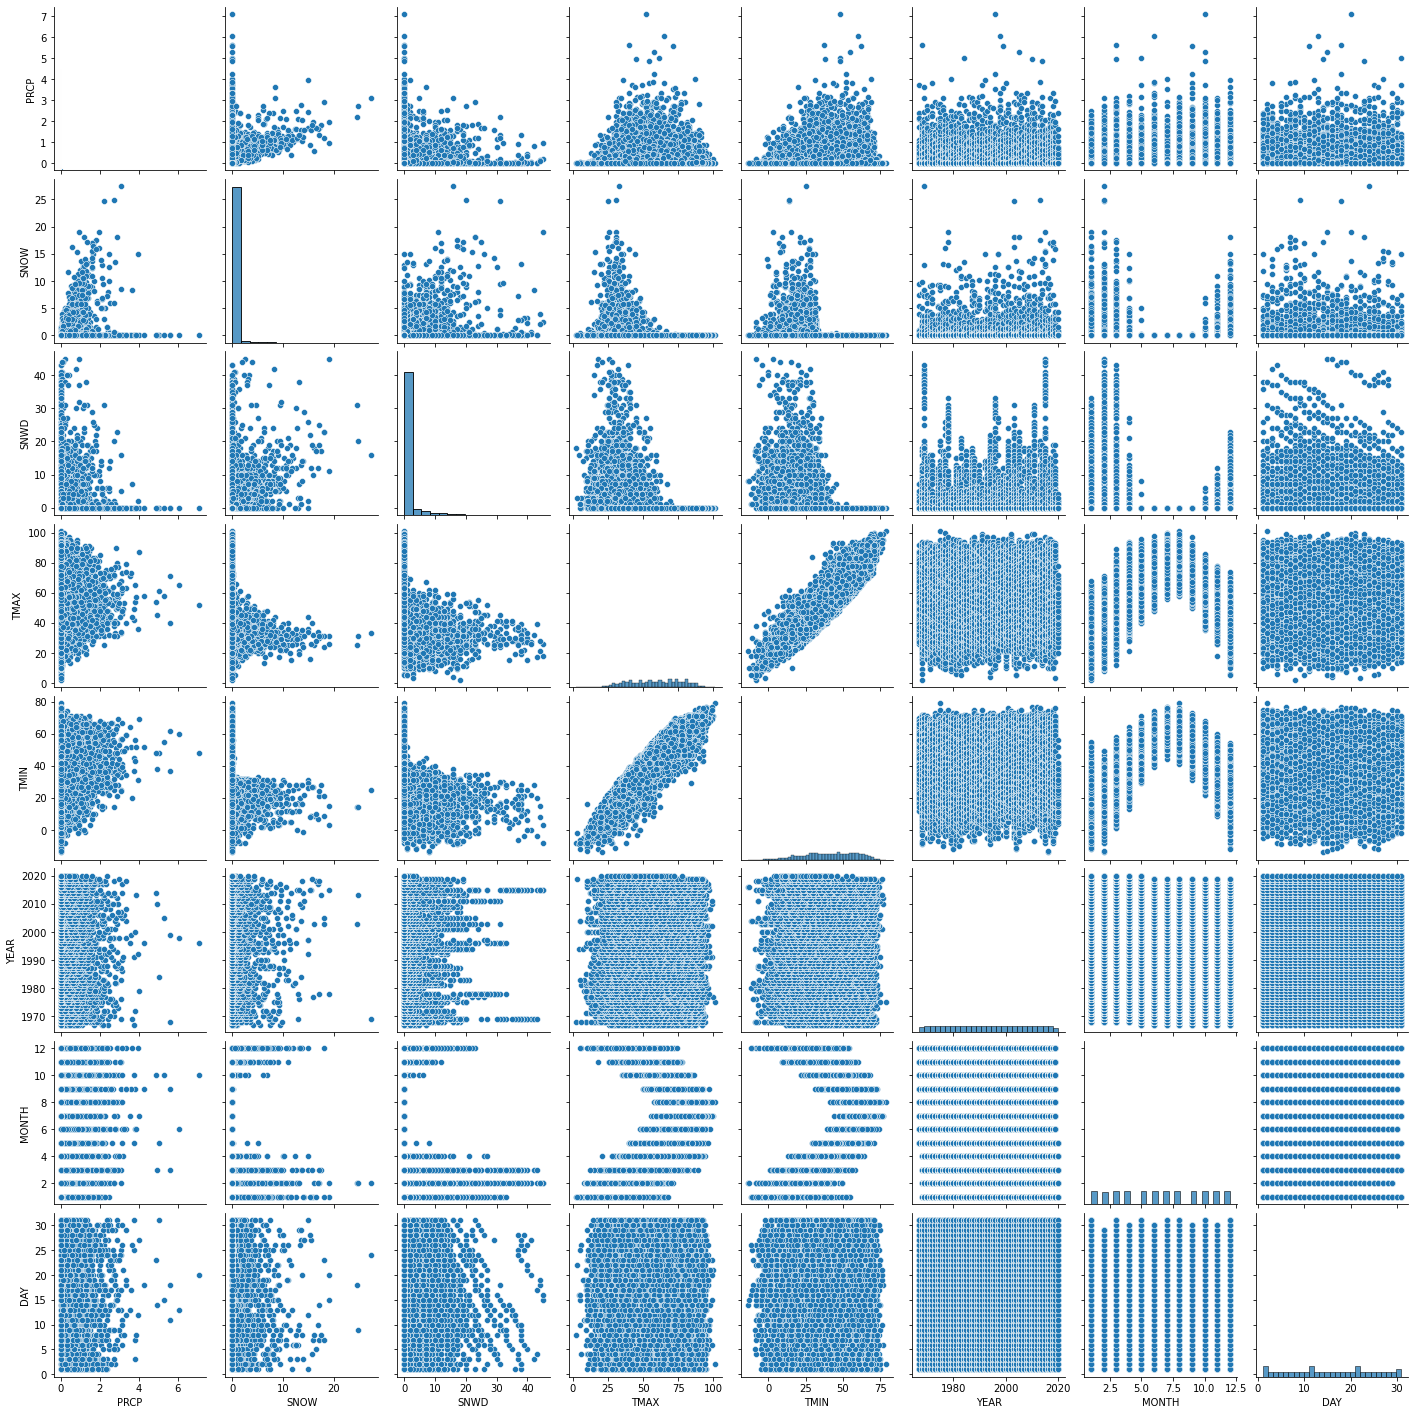

In [11]:
import seaborn as sns

sns.pairplot(df_snowfall)

Now, we can use `pymc3` (similar to `statsmodels` but for Bayesian statistics) to build a specific Bayesian regression model (Generalized Linear Model) for us.  We build our model using the same steps as with all of Bayesian statistics:
1. Choose a distribution for the prior.
2. Pick how we want to model the likelihood of our parameter (either $a$, $b$, or $\epsilon$).
3. Run a sampler, such as Markov Chain Monte Carlo, to sample the posterior. This sampling is required because computing every single possible density can take significant resources.  Let's discuss why!
4. Analyze the output.

#### Using the PyMC3 formula interface:

In [12]:
import theano

print(theano.config.cxx)

/home/curt/mambaforge/bin/g++


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, MONTH, Intercept]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 35 seconds.


this still has access to the model
hello this no longer has access to the model


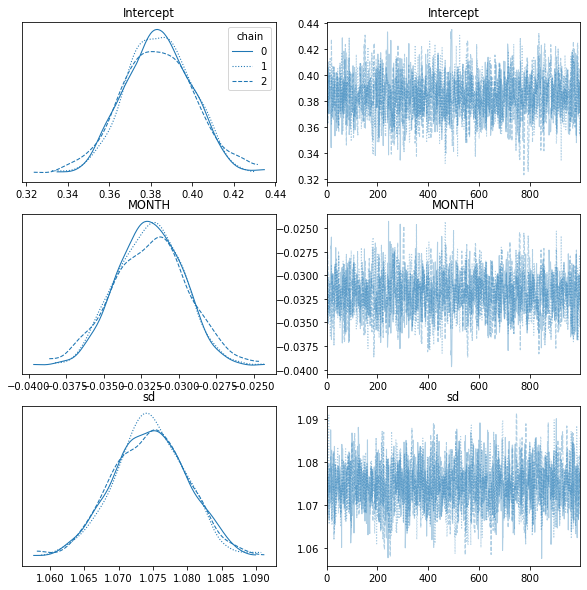

In [14]:
import numpy as np
import pymc3
import matplotlib.pyplot as plt
import arviz  # Bayesian version of seaborn

df_trace = None  # memory placeholder
trace = None  # memory placeholder

with pymc3.Model() as snowfall_model:  # context manager in Python
    likelihood_family = pymc3.glm.families.Normal()
    pymc3.GLM.from_formula(formula="SNOW ~ MONTH",  # formula="SNOW ~ 1 + MONTH + np.power(MONTH, 2)", 
                           data=df_snowfall, family=likelihood_family)
    trace = pymc3.sample(init="adapt_diag", random_seed=42, 
                         return_inferencedata=True)
    print("this still has access to the model")
    df_trace = arviz.summary(trace)
    arviz.plot_trace(trace, figsize=(10, 10), legend=True)

print("hello this no longer has access to the model")

In [15]:
df_trace

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.384,0.017,0.354,0.415,0.0,0.0,1244.0,1484.0,1.0
MONTH,-0.032,0.002,-0.036,-0.028,0.0,0.0,1311.0,1419.0,1.0
sd,1.075,0.005,1.064,1.085,0.0,0.0,1625.0,1114.0,1.0


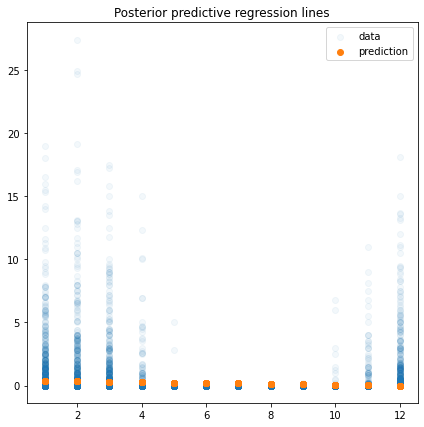

In [19]:
plt.figure(figsize=(7, 7))
plt.scatter(df_snowfall["MONTH"], df_snowfall["SNOW"], label="data", alpha=0.05)

# y_model = df_trace["mean"]["np.power(MONTH, 2)"] * np.power(df_snowfall["MONTH"], 2) 
y_model = df_trace["mean"]["MONTH"] * df_snowfall["MONTH"] 
y_model += df_trace["mean"]["Intercept"]
plt.scatter(df_snowfall["MONTH"], y_model, label="prediction")

plt.title("Posterior predictive regression lines")
plt.legend()

#### Using the `bambi` formula interface:

In [21]:
import bambi as bmb

lin_model = bmb.Model("SNOW ~ MONTH", data=df_snowfall)  # np.power(MONTH, 2) + MONTH + 1", data=df_snowfall)
lin_model_fit = lin_model.fit(tune=2000, draws=2000, init="adapt_diag", 
                              pickle_backend="dill", cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [SNOW_sigma, Intercept, MONTH]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


array([<AxesSubplot:title={'center':'Intercept'}>,
       <AxesSubplot:title={'center':'MONTH'}>,
       <AxesSubplot:title={'center':'SNOW_sigma'}>], dtype=object)

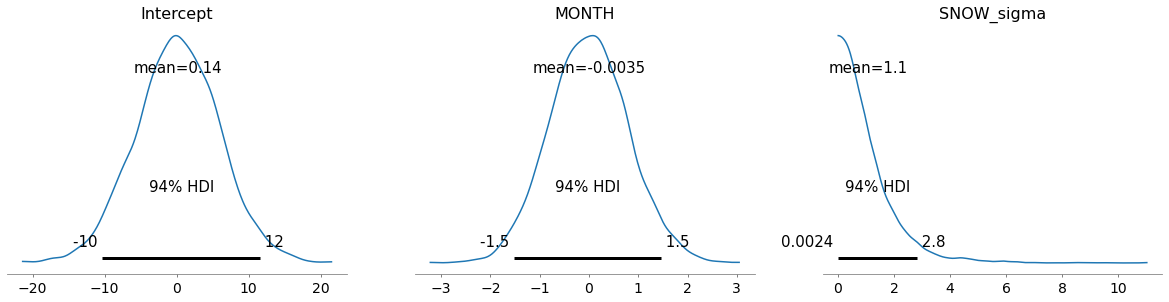

In [22]:
lin_model.plot_priors()

In [23]:
lin_model

Formula: SNOW ~ MONTH
Family name: Gaussian
Link: identity
Observations: 19309
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0.175, sigma: 5.7741)
    MONTH ~ Normal(mu: 0.0, sigma: 0.7826)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0799)


------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'MONTH'}>],
       [<AxesSubplot:title={'center':'SNOW_sigma'}>,
        <AxesSubplot:title={'center':'SNOW_sigma'}>]], dtype=object)

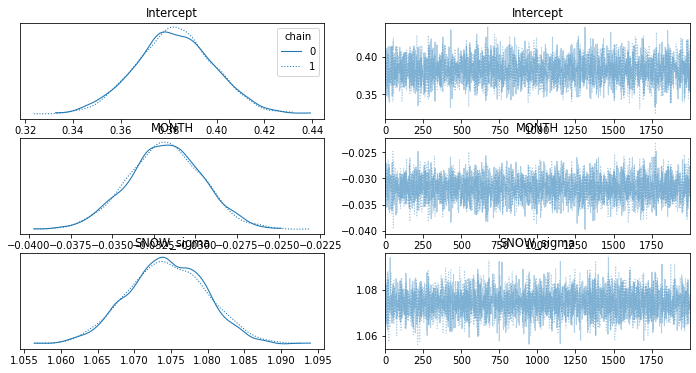

In [24]:
arviz.plot_trace(lin_model_fit, legend=True)

In [25]:
df_lin_model_fit = arviz.summary(lin_model_fit)
df_lin_model_fit

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.383,0.016,0.352,0.413,0.0,0.0,4959.0,2743.0,1.0
MONTH,-0.032,0.002,-0.036,-0.028,0.0,0.0,4986.0,2812.0,1.0
SNOW_sigma,1.074,0.005,1.065,1.085,0.0,0.0,5186.0,2841.0,1.0


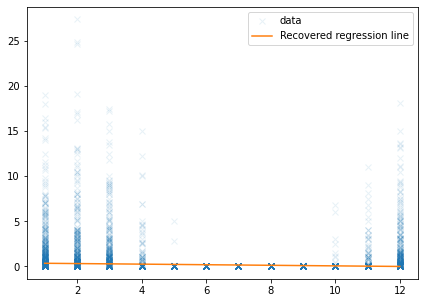

In [27]:
plt.figure(figsize=(7, 5))
plt.plot(df_snowfall["MONTH"], df_snowfall["SNOW"], "x", label="data", alpha=0.1)
x_range = np.linspace(df_snowfall["MONTH"].min(), df_snowfall["MONTH"].max(), 2000)
y_pred = df_lin_model_fit["mean"]["Intercept"]
# y_pred = df_lin_model_fit["mean"]["np.power(MONTH, 2)"] * (np.power(x_range, 2))
y_pred += df_lin_model_fit["mean"]["MONTH"] * x_range
plt.plot(x_range, y_pred, label="Recovered regression line")
plt.legend()

We see from the data plots and from this plot above that a plain old single linear regression probably isn't the right model to do.  Let's try a quadratic linear regression:

In [28]:
import bambi as bmb

# y = ax^2 + mx + b
lin_model = bmb.Model("SNOW ~ np.power(MONTH, 2) + MONTH + 1", data=df_snowfall)
lin_model_fit = lin_model.fit(tune=2000, draws=2000, init="adapt_diag", 
                              pickle_backend="dill", cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [SNOW_sigma, Intercept, MONTH, np.power(MONTH, 2)]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 121 seconds.


In [31]:
arviz.summary(lin_model_fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.888,0.028,0.836,0.937,0.001,0.0,1583.0,2421.0,1.0
"np.power(MONTH, 2)",0.017,0.001,0.015,0.018,0.000,0.0,1804.0,1796.0,1.0
MONTH,-0.248,0.010,-0.265,-0.229,0.000,0.0,1650.0,2213.0,1.0
SNOW_sigma,1.060,0.006,1.050,1.071,0.000,0.0,2906.0,1792.0,1.0


In [30]:
arviz.plot_trace(lin_model_fit, legend=True)

df_lin_model_fit = arviz.summary(lin_model_fit)

plt.figure(figsize=(7, 5))
plt.plot(df_snowfall["MONTH"], df_snowfall["SNOW"], "x", label="data", alpha=0.1)
x_range = np.linspace(df_snowfall["MONTH"].min(), df_snowfall["MONTH"].max(), 2000)
y_pred = df_lin_model_fit["mean"]["Intercept"]  # +b
y_pred += df_lin_model_fit["mean"]['np.power(MONTH, 2)'] * (np.power(x_range, 2))  # a*x^2
y_pred += df_lin_model_fit["mean"]["MONTH"] * x_range  # m*x
plt.plot(x_range, y_pred, label="Recovered regression line")
plt.legend()

In [38]:
df_snowfall.groupby(["MONTH"]).mean()["SNOW"]

MONTH
1     0.537188
2     0.588702
3     0.403350
4     0.091258
5     0.004887
6     0.000000
7     0.000000
8     0.000000
9     0.000128
10    0.014121
11    0.085472
12    0.393183
Name: SNOW, dtype: float64

In [ ]:
df_snowfall.groupby(["MONTH"]).std()["SNOW"]

MONTH
1     1.771705
2     2.149145
3     1.583329
4     0.752913
5     0.141682
6     0.000000
7     0.000000
8     0.000000
9     0.005060
10    0.249619
11    0.630889
12    1.516142
Name: SNOW, dtype: float64

In [40]:
y_true_means = df_snowfall.groupby(["MONTH"]).mean()["SNOW"]
x_range = np.arange(1, 13)
y_pred = df_lin_model_fit["mean"]["Intercept"]  # +b
y_pred += df_lin_model_fit["mean"]['np.power(MONTH, 2)'] * (np.power(x_range, 2))  # a*x^2
y_pred += df_lin_model_fit["mean"]["MONTH"] * x_range  # m*x

In [42]:
import sklearn.metrics

sklearn.metrics.r2_score(y_true_means, y_pred)

0.8628999505108548

#### Let's try using more features!

Let's see if using the temperature helps us predict snowfall:

In [152]:
big_lin_model = bmb.Model("SNOW ~ TMIN + TMAX + (1|MONTH)", data=df_snowfall)
big_lin_model

Formula: SNOW ~ TMIN + TMAX + (1|MONTH)
Family name: Gaussian
Link: identity
Observations: 19309
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0.175, sigma: 10.7482)
    TMIN ~ Normal(mu: 0.0, sigma: 0.1553)
    TMAX ~ Normal(mu: 0.0, sigma: 0.1424)

  Group-level effects
    1|MONTH ~ Normal(mu: 0, sigma: HalfNormal(sigma: 10.7482))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0799)


In [153]:
big_lin_model_fit = big_lin_model.fit(init="adapt_diag", 
                                      pickle_backend="dill", cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [SNOW_sigma, 1|MONTH_offset, 1|MONTH_sigma, Intercept, TMAX, TMIN]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 66 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [154]:
df_big_lin_model = arviz.summary(big_lin_model_fit)
df_big_lin_model

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.985,0.056,0.884,1.088,0.002,0.001,725.0,1105.0,1.00
TMIN,0.003,0.001,0.000,0.006,0.000,0.000,1069.0,1072.0,1.00
TMAX,-0.016,0.001,-0.018,-0.014,0.000,0.000,1219.0,1113.0,1.01
1|MONTH_sigma,0.120,0.032,0.071,0.176,0.002,0.001,471.0,674.0,1.00
1|MONTH[1],0.042,0.047,-0.047,0.126,0.002,0.002,457.0,886.0,1.00
1|MONTH[2],0.123,0.046,0.040,0.212,0.002,0.001,571.0,887.0,1.00
1|MONTH[3],0.049,0.044,-0.031,0.132,0.002,0.001,543.0,881.0,1.00
1|MONTH[4],-0.096,0.042,-0.178,-0.016,0.002,0.001,535.0,791.0,1.00
1|MONTH[5],-0.043,0.042,-0.119,0.040,0.002,0.001,425.0,645.0,1.00
1|MONTH[6],0.055,0.045,-0.027,0.141,0.002,0.001,531.0,773.0,1.00


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'np.power(MONTH, 2)'}>,
        <AxesSubplot:title={'center':'np.power(MONTH, 2)'}>],
       [<AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'MONTH'}>],
       [<AxesSubplot:title={'center':'TMIN'}>,
        <AxesSubplot:title={'center':'TMIN'}>],
       [<AxesSubplot:title={'center':'TMAX'}>,
        <AxesSubplot:title={'center':'TMAX'}>],
       [<AxesSubplot:title={'center':'SNOW_sigma'}>,
        <AxesSubplot:title={'center':'SNOW_sigma'}>]], dtype=object)

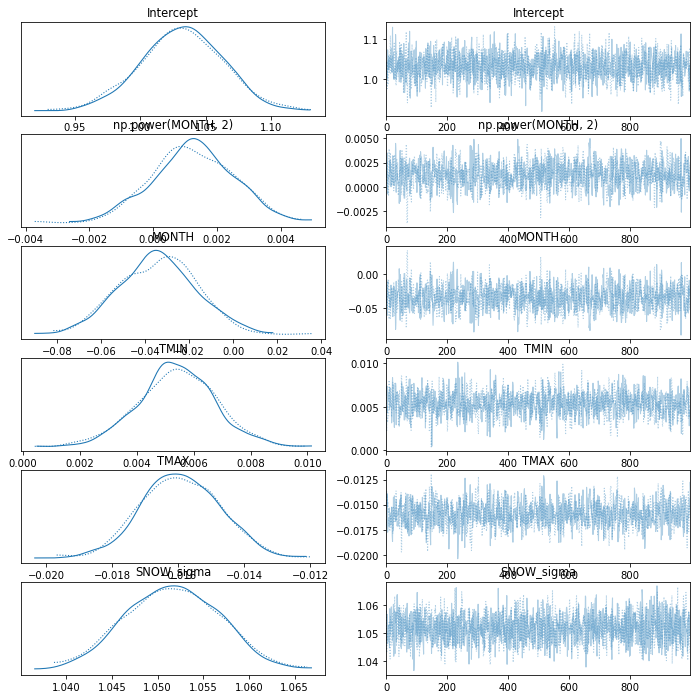

In [145]:
arviz.plot_trace(big_lin_model_fit)

<AxesSubplot:xlabel='SNOW / SNOW'>

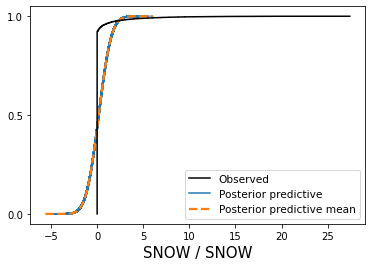

In [ ]:
posterior_predictive = big_lin_model.predict(big_lin_model_fit, kind="pps", draws=500)
arviz.plot_ppc(big_lin_model_fit, kind="cumulative")

In [151]:
df_snowfall_results = df_snowfall.copy()
df_snowfall_results["SNOW_pred"] = df_snowfall_results["MONTH"] * df_big_lin_model["mean"]["MONTH"] + \
                                   df_snowfall_results["MONTH"] * df_big_lin_model["mean"]["np.power(MONTH, 2)"] + \
                                   df_snowfall_results["TMIN"] * df_big_lin_model["mean"]["TMIN"] + \
                                   df_snowfall_results["TMAX"] * df_big_lin_model["mean"]["TMAX"] + \
                                   df_snowfall_results["TMAX"] * df_snowfall_results["TMIN"] * df_big_lin_model["mean"]["TMIN:TMAX"] + \
                                   df_big_lin_model["mean"]["Intercept"]
# df_snowfall_results[["SNOW", "SNOW_pred"]]
sklearn.metrics.r2_score(df_snowfall_results["SNOW"], df_snowfall_results["SNOW_pred"])

-0.750864431788004

#### Using the PyMC3 object-oriented interface:

### Example GLM problem using Robust Linear Regression

**Dataset:** `https://github.com/AllenDowney/ThinkBayes2/raw/master/data/2239075.csv`

**Research question:** Can we create a Bayesian regression model to predict snowfall?

**Why do we want to use Robust Linear Regression?** Robust Linear Regression uses the t-distribution instead of the Normal distribution, meaning that outliers do not affect the model as strongly.

![Robust vs. Ordinary Linear Regression](robust_vs_normal.png)

Note that regression is still: $y = ax + b + \epsilon$

In [52]:
import bambi as bmb

rob_model = bmb.Model("SNOW ~ np.power(MONTH, 2) + MONTH + 1", data=df_snowfall,
                      family="t")
rob_model_fit = rob_model.fit(init="advi", tune=3000, draws=2000, 
                              pickle_backend="dill", cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 49600
Interrupted at 49,599 [99%]: Average Loss = 33,137
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [SNOW_nu, SNOW_sigma, Intercept, MONTH, np.power(MONTH, 2)]


Sampling 1 chain for 3_000 tune and 2_000 draw iterations (3_000 + 2_000 draws total) took 533 seconds.
There were 830 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2970605799324394, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


## We can try making the data more friendly by applying scaling or normalization (subtract mean, divide by stdev).

In [65]:
df_snowfall_snow_mean = df_snowfall["SNOW"].mean()
print(df_snowfall_snow_mean)
df_snowfall_snow_std = df_snowfall["SNOW"].std()
print(df_snowfall_snow_std)
df_snowfall_snow_norm = (df_snowfall["SNOW"] - df_snowfall_snow_mean) / (2 * df_snowfall_snow_std)

df_snowfall_month_mean = df_snowfall["MONTH"].mean()
df_snowfall_month_std = df_snowfall["MONTH"].std()
df_snowfall_month_centered = (df_snowfall["MONTH"] - df_snowfall_month_mean) / (2 * df_snowfall_month_std)

print(df_snowfall_snow_norm.describe())
print(df_snowfall_month_centered.describe())
df_snowfall_friendly = pd.concat((df_snowfall_snow_norm, df_snowfall_month_centered), axis=1)
df_snowfall_friendly.head()

0.17498057900460923
1.0799571249065762
count    1.930900e+04
mean     1.251150e-17
std      5.000000e-01
min     -8.101274e-02
25%     -8.101274e-02
50%     -8.101274e-02
75%     -8.101274e-02
max      1.260468e+01
Name: SNOW, dtype: float64
count    1.930900e+04
mean    -4.268629e-17
std      5.000000e-01
min     -8.003045e-01
25%     -3.655372e-01
50%      6.923013e-02
75%      5.039974e-01
max      7.938423e-01
Name: MONTH, dtype: float64


,SNOW,MONTH
0,-0.081013,-0.220615
1,-0.081013,-0.220615
2,-0.081013,-0.220615
3,-0.081013,-0.220615
4,-0.081013,-0.220615


In [116]:
# priors_snowfall = {"Intercept": bmb.priors.Prior("HalfNormal"),
#                    "sigma": bmb.priors.Prior("Uniform")}
rob_model = bmb.Model("SNOW ~ MONTH + TMAX + TMIN", data=df_snowfall,  # _friendly,
                      family="t")  # , priors=priors_snowfall)
rob_model

Formula: SNOW ~ MONTH + TMAX + TMIN
Family name: T
Link: identity
Observations: 19309
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0.175, sigma: 11.8985)
    MONTH ~ Normal(mu: 0.0, sigma: 0.7826)
    TMAX ~ Normal(mu: 0.0, sigma: 0.1424)
    TMIN ~ Normal(mu: 0.0, sigma: 0.1553)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0799)
    nu ~ Gamma(alpha: 2, beta: 0.1)


In [117]:
rob_model_fit = rob_model.fit(init="advi",  # tune=3000, draws=2000, 
                              pickle_backend="dill", cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Finished [100%]: Average Loss = -47,690
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [SNOW_nu, SNOW_sigma, Intercept, TMIN, TMAX, MONTH]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
There were 380 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5312791252929118, but should be close to 0.8. Try to increase the number of tuning steps.
There were 340 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4994614795379117, but should be close to 0.8. Try to increase the number of tuning steps.
There were 280 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4188414796799988, but should be close to 0.8. Try to increase the number of tuning steps.
There were 314 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.46000194980128606, but should be close

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'np.power(MONTH, 2)'}>,
        <AxesSubplot:title={'center':'np.power(MONTH, 2)'}>],
       [<AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'MONTH'}>],
       [<AxesSubplot:title={'center':'SNOW_sigma'}>,
        <AxesSubplot:title={'center':'SNOW_sigma'}>],
       [<AxesSubplot:title={'center':'SNOW_nu'}>,
        <AxesSubplot:title={'center':'SNOW_nu'}>]], dtype=object)

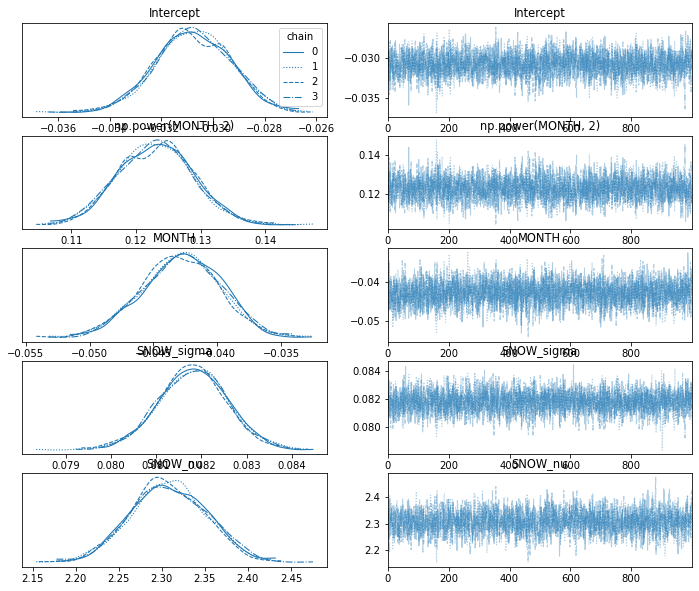

In [108]:
arviz.plot_trace(rob_model_fit, legend=True)

In [118]:
df_rob_model = arviz.summary(rob_model_fit)
df_rob_model

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.000,0.000,-0.000,0.000,0.000,0.000,432.0,449.0,1.05
MONTH,0.000,0.000,-0.000,0.000,0.000,0.000,237.0,276.0,1.04
TMAX,0.000,0.000,-0.000,0.000,0.000,0.000,205.0,379.0,1.05
TMIN,-0.000,0.000,-0.000,0.000,0.000,0.000,203.0,382.0,1.05
SNOW_sigma,0.000,0.000,0.000,0.000,0.000,0.000,4.0,11.0,4.52
SNOW_nu,0.794,0.011,0.783,0.813,0.006,0.004,4.0,11.0,3.39


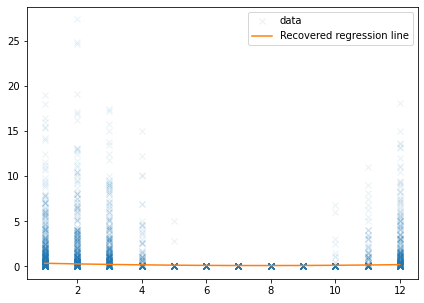

In [110]:
plt.figure(figsize=(7, 5))
plt.plot(df_snowfall["MONTH"], df_snowfall["SNOW"], "x", label="data", alpha=0.1)
x_range_unscaled = np.arange(df_snowfall["MONTH"].min(), df_snowfall["MONTH"].max() + 1)
x_range = (x_range_unscaled - df_snowfall_month_mean) / (2 * df_snowfall_month_std)
y_pred = df_rob_model["mean"]["Intercept"]  # +b
y_pred += df_rob_model["mean"]['np.power(MONTH, 2)'] * (np.power(x_range, 2))  # a*x^2
y_pred += df_rob_model["mean"]["MONTH"] * x_range  # m*x
y_pred *= 2 * df_snowfall_snow_std
y_pred += df_snowfall_snow_mean
plt.plot(x_range_unscaled, y_pred, label="Recovered regression line")
plt.legend()

In [113]:
print(f"y_true_means: {y_true_means}")
print(f"y_pred: {y_pred}")
sklearn.metrics.r2_score(y_true_means, y_pred)

y_true_means: MONTH
1     0.537188
2     0.588702
3     0.403350
4     0.091258
5     0.004887
6     0.000000
7     0.000000
8     0.000000
9     0.000128
10    0.014121
11    0.085472
12    0.393183
Name: SNOW, dtype: float64
y_pred: [0.35251046 0.28300454 0.22465807 0.17747105 0.14144348 0.11657537
 0.1028667  0.10031749 0.10892773 0.12869742 0.15962656 0.20171515]


0.5172448455496154

### Example GLM problem using Hierarchical Linear Regression

